# Plots and visualizations with Julia
### Dr. Tirthajyoti Sarkar, Fremont, CA
---


In [1]:
f(x) = (3x.^2 + 6x .- 9).*exp.(-0.3x)

f (generic function with 1 method)

In [2]:
x = collect(range(-5,10,length=151));
y = f(x);

In [3]:
using Plots
pyplot()

Plots.PyPlotBackend()

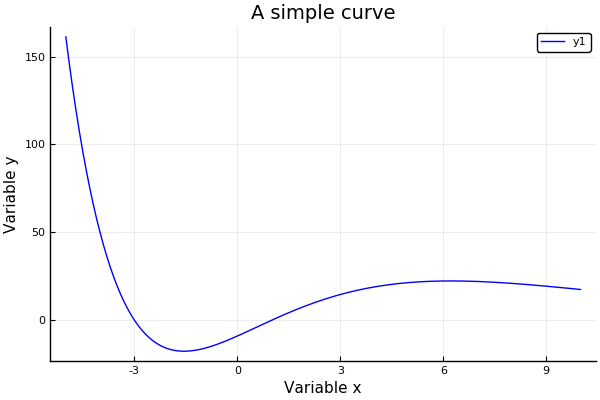

In [4]:
plot(x,y,title="A simple curve",xlabel="Variable x",ylabel="Variable y",color="blue")

In [5]:
using Astro
using Dates

In [6]:
days = Dates.datetime2julian.(Dates.DateTime(2018, 1, 1, 0, 0, 0):Dates.Day(1):Dates.DateTime(2018, 12, 31, 0, 0, 0));
eq_values = map(equation_time, days);

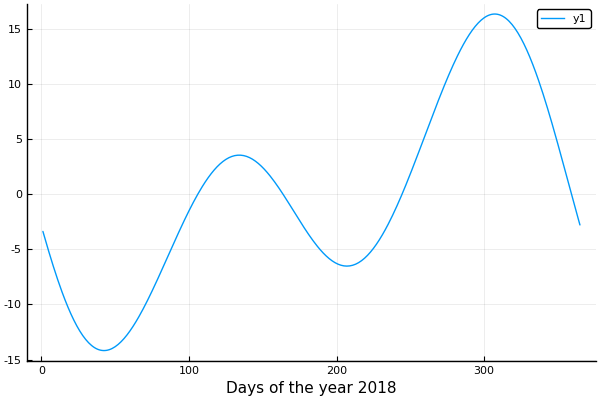

In [7]:
plot(eq_values,xlabel="Days of the year 2018")

In [8]:
unicodeplots()
plot(eq_values)

                       +------------------------------------------------------------+   
    17.243001054085465 | |                                             .,-_         | y1
                       | |                                            ./  "\.       |   
                       | |                                           .`     l.      |   
                       | |                                          .`       \      |   
                       | |                                         ,`        ",     |   
                       | |                                         /          \     |   
                       | |                                        /            .    |   
                       | |                                       .`            \    |   
                       | |                  .r-..               ./              .   |   
                       | |                ./`   '\.             /               \.  |   
                     

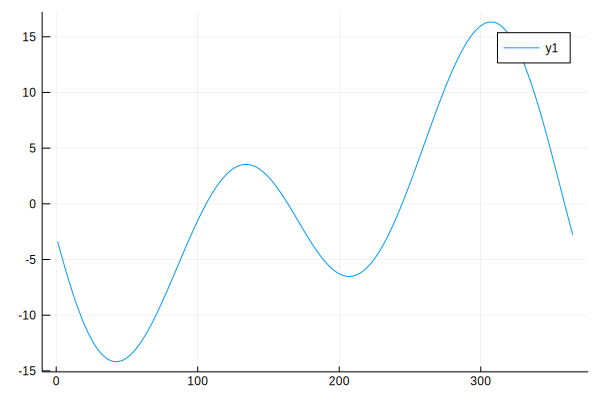

In [9]:
gr();
plot(eq_values)

In [10]:
pyplot()

Plots.PyPlotBackend()

In [11]:
equation(d) = -7.65 * sind(d) + 9.87 * sind(2d + 206);

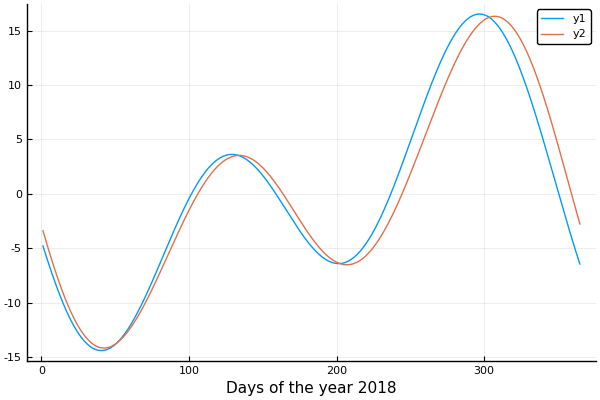

In [12]:
plot(equation, 1:365)
plot!(eq_values,xlabel="Days of the year 2018")

In [13]:
days = Dates.DateTime(2018, 1, 1, 0, 0, 0):Dates.Day(1):Dates.DateTime(2018, 12, 31, 0, 0, 0);
datestrings = Dates.format.(days, "u dd");

In [14]:
pyplot()

Plots.PyPlotBackend()

### Embellishments on the plot

For detailed plot, axis attributes see this tutorial page: http://docs.juliaplots.org/latest/attributes/

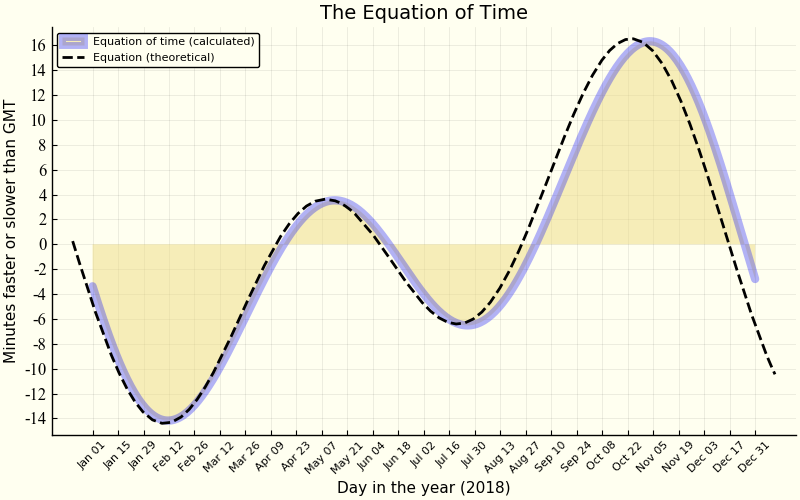

In [15]:
plot(                                    
    eq_values,                                        
                                                      
    label  = "Equation of time (calculated)",
    line=(:blue, 0.3, 6, :solid),                
                                                  
    size=(800, 500),                              
                                                  
    xticks = (1:14:366, datestrings[1:14:366]),   
    yticks = (-20:2:20),
    ytickfont = font(12, "Times New Roman"),
                                                  
    ylabel = "Minutes faster or slower than GMT", 
    xlabel = "Day in the year (2018)",                       
                                                  
    title  = "The Equation of Time",              
    xrotation = rad2deg(pi/4),                    
                                                  
    fillrange = 0,                                
    fillalpha = 0.5,                             
    fillcolor = :lightgoldenrod,                  
                                                  
    background_color = :ivory                     
    )
plot!(
    equation,
    label = "Equation (theoretical)",
    line=(:black, 1.0, 2, :dash))

### Using `Distributions`

In [16]:
using Distributions

In [17]:
ages = [rand(15:55,1000)];

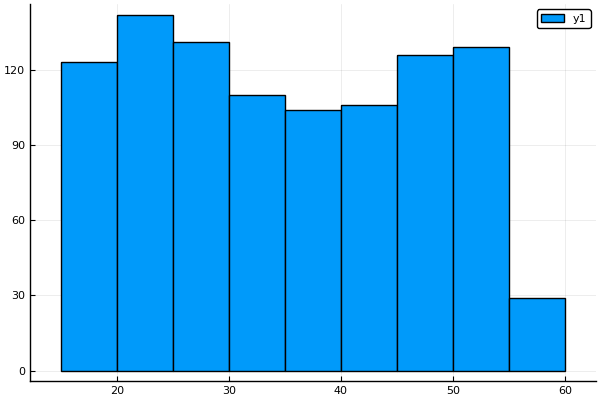

In [18]:
histogram(ages)

In [19]:
d=Normal(35.0,10.0);
ages = rand(d,1000);

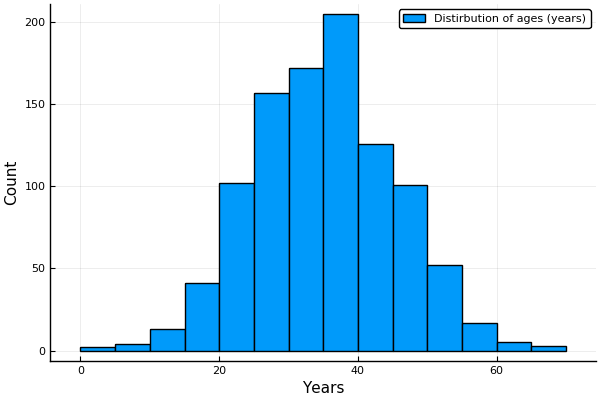

In [20]:
histogram(
    ages,
    label="Distirbution of ages (years)",
    xlabel = "Years",
    ylabel= "Count"
)

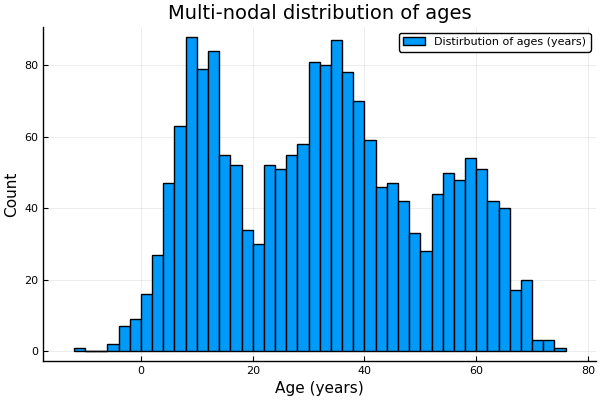

In [21]:
d1=Normal(10.0,5.0)
d2=Normal(35.0,10.0);
d3=Normal(60.0,5.0);
N=1000;
ages = (Float64)[];
ages = append!(ages,rand(d1,Int64(ceil(N/2))));
ages = append!(ages,rand(d2,N));
ages = append!(ages,rand(d3,Int64(ceil(N/3))));

histogram(
    ages,
    bins=50,
    label="Distirbution of ages (years)",
    xlabel = "Age (years)",
    ylabel= "Count",
    title = "Multi-nodal distribution of ages"
)

In [22]:
plot(Normal(3,5), fill=(0, .5,:orange))

ErrorException: Cannot convert Normal{Float64} to series data for plotting

In [23]:
dist = Gamma(2)
scatter(dist, leg=false)
bar!(dist, func=cdf, alpha=0.3)

ErrorException: Cannot convert Gamma{Float64} to series data for plotting

#### Quantile-quantile (Q-Q) plot
Pass an instance (e.g. `Normal(0,1)`) to compare with a specific distribution.
the :R default line passes through the 1st and 3rd quartiles of the distribution

In [24]:
x = rand(Normal(), 100);
y = rand(Cauchy(), 100);

In [25]:
plot(
    qqplot(x, y, qqline = :fit), # qqplot of two samples, show a fitted regression line
    qqplot(Cauchy, y),           # compare with a Cauchy distribution fitted to y;
    qqnorm(x, qqline = :R),
    layout=(1,3),
    size=(900,300)
)

UndefVarError: UndefVarError: qqplot not defined

### Subplots and layout

The first method is to define a layout which will split a series. The `layout` command takes in a 2-tuple `layout=(N,M)` which builds an `NxM` grid of plots. It will automatically split a series to be in each plot. For example, if we do `layout=(4,1)` on a plot with four series, then we will get four rows of plots, each with one series in it.

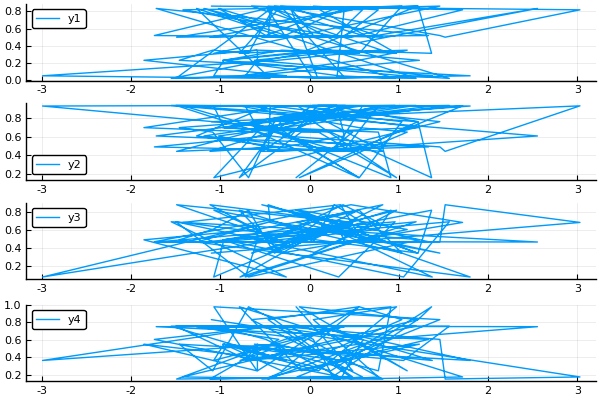

In [26]:
y = rand(10,4)
plot(x,y,layout=(4,1))

Pass an integer to layout to allow it to automatically compute a grid size for that many subplots

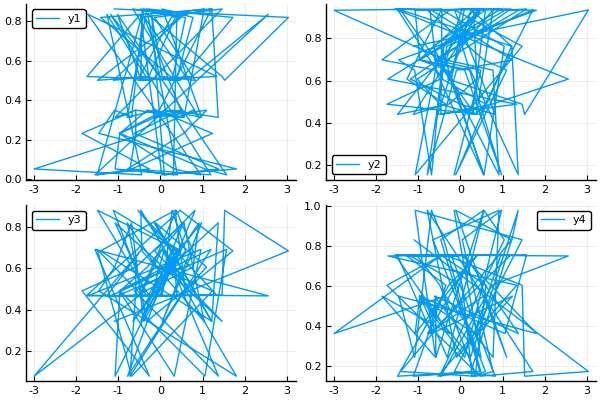

In [27]:
plot(x,y,layout=4)

Slightly more complex grid layouts can be created with the `grid(...)` constructor. For example, in the following layout, we create subplots with different heights. 
<br>The `heights` argument takes an array as input with fractions of desired heights. If the fractions do not add up to 1.0, then some subplots may not be displayed properly.

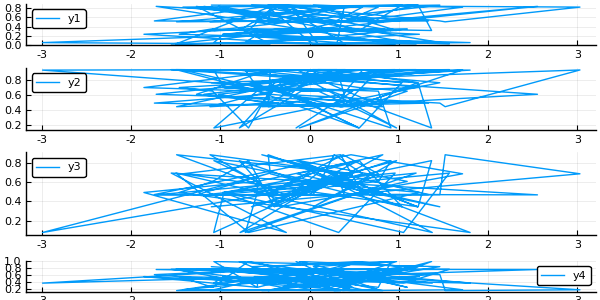

In [28]:
plot(x,y, size=(600,300),layout = grid(4,1,heights=[0.2,0.3,0.4,0.15]))

We can also use layouts on plots of plot objects. For example, we can generate for separate plots and make a single plot that combines them in a $2\times2$ grid via the following:

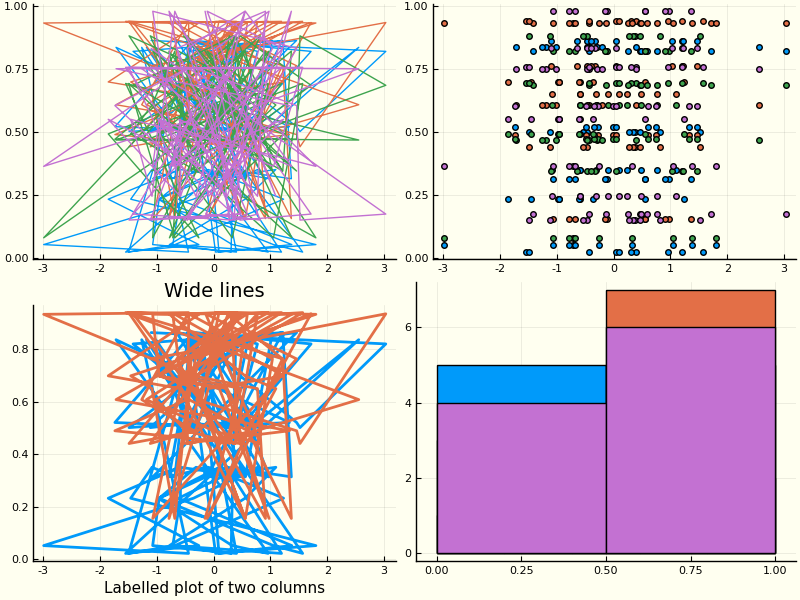

In [29]:
p1 = plot(x,y) # Make a line plot
p2 = scatter(x,y) # Make a scatter plot
p3 = plot(x,y[:,1:2],xlabel="Labelled plot of two columns",lw=2,title="Wide lines")
p4 = histogram(x,y) # Four histograms each with 10 points!
plot(
    p1,p2,p3,p4,
    layout=(2,2),
    legend=false,
    size=(800,600),
    background_color = :ivory)

Notice that the attributes in the individual plots are applied to the individual plots, while the attributes on the final `plot` call are applied to all of the subplots.

### Advanced layout with the `@layout` macro
The `@layout` macro is the easiest way to define complex layouts, using Julia's [multidimensional Array construction](https://docs.julialang.org/en/latest/manual/arrays/#Concatenation-1) as the basis for a custom layout syntax. Precise sizing can be achieved with curly brackets, otherwise the free space is equally split between the plot areas of subplots.

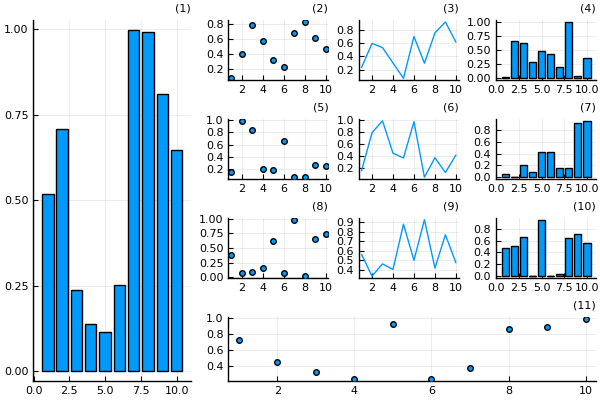

In [30]:
l = @layout [  a{0.3w} [grid(3,3)
                         b{0.2h} ]]
plot(
    rand(10,11),
    layout = l, legend = false, seriestype = [:bar :scatter :path],
    title = ["($i)" for j = 1:1, i=1:11], titleloc = :right, titlefont = font(8)
)

### Using `VegaLite` package

In [31]:
using VegaLite, VegaDatasets

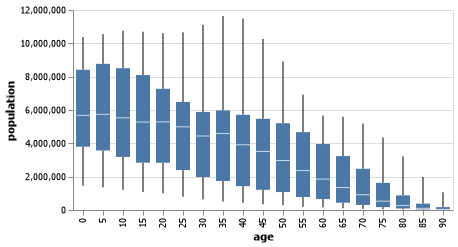

In [32]:
dataset("population") |>
@vlplot(
    mark={:boxplot, extent="min-max"},
    x="age:o",
    y={:people, axis={title="population"}}
)

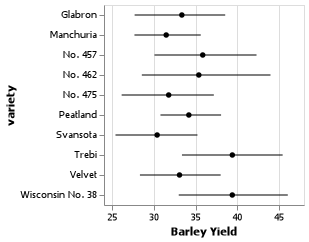

In [33]:
using VegaLite, VegaDatasets

dataset("barley") |>
@vlplot(y="variety:o") +
@vlplot(
    mark={
        :point,
        filled=true
    },
    x={
        "mean(yield)",
        scale={zero=false},
        title="Barley Yield"
    },
    color={value=:black}
) +
@vlplot(
    mark={
        :errorbar,
        extent=:ci
     },
     x={"yield:q", title="Barley Yield"}
)

### Using `StatsPlots` and `SeriesReceipe`
StatsPlots.jl also introduces new series recipes. The key is that you don't have to do anything differently: after using `StatsPlots` you can simply use those new series recipes as though they were built into the plotting libraries. Let's use the `Violin` plot on some random data

In [34]:
using StatsPlots

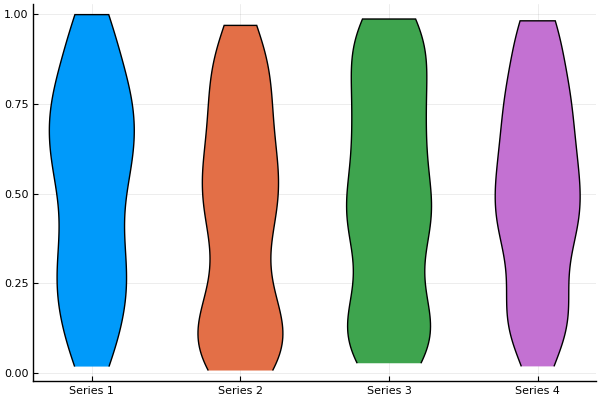

In [35]:
y = rand(100,4) # Four series of 100 points each
violin(["Series 1" "Series 2" "Series 3" "Series 4"],y,leg=false)

and we can add a `boxplot` on top using the same mutation commands (command with a **!**) as before,

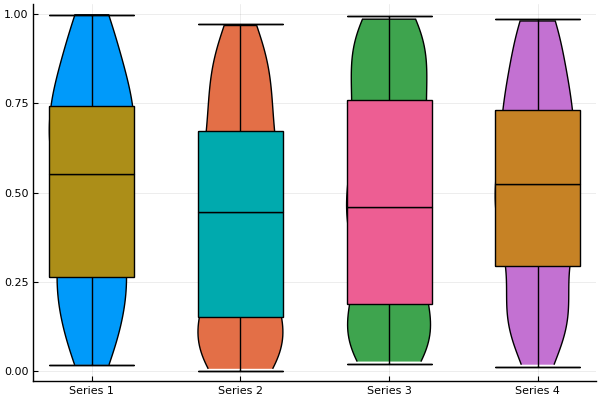

In [36]:
boxplot!(["Series 1" "Series 2" "Series 3" "Series 4"],y,leg=false)

### Marker shape

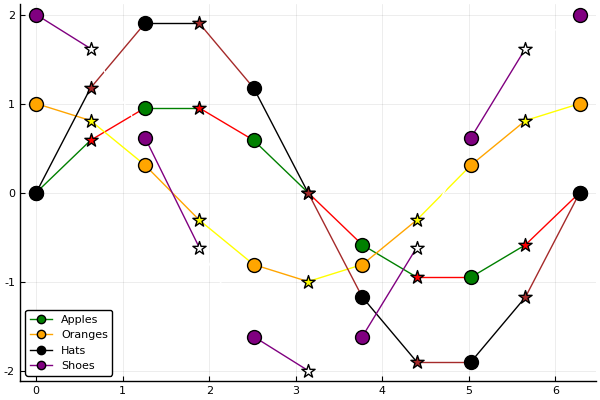

In [37]:
# 10 data points in 4 series
xs = 0 : 2π/10 : 2π
data = [sin.(xs) cos.(xs) 2sin.(xs) 2cos.(xs)]

# We put labels in a row vector: applies to each series
labels = ["Apples" "Oranges" "Hats" "Shoes"]

# Marker shapes in a column vector: applies to data points
markershapes = [:circle, :star5]

# Marker colors in a matrix: applies to series and data points
markercolors = [:green :orange :black :purple
                :red   :yellow :brown :white]

plot(xs, data, label = labels, shape = markershapes, color = markercolors,
     markersize = 10)

### Functions

Functions can typically be used in place of input data, and they will be mapped as needed. 2D and 3D parametric plots can also be created, and ranges can be given as vectors or min/max. For example, here are alternative methods to create the same plot:

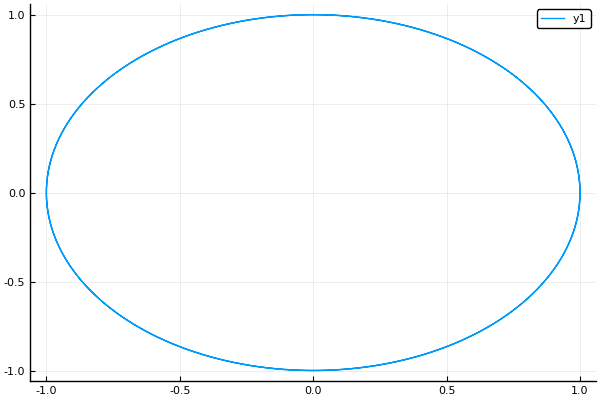

In [38]:
tmin = 0
tmax = 4π
tvec = range(tmin, stop=tmax, length=100)

plot(sin.(tvec), cos.(tvec))
plot(sin, cos, tvec)
plot(sin, cos, tmin, tmax)

### Using `DataFrames` with `StatsPlots`

In [39]:
using DataFrames, IndexedTables

In [40]:
df = DataFrame(a = 1:10, b = 10 .* rand(10), c = 10 .* rand(10));

In [41]:
df

,a,b,c
,Int64,Float64,Float64
1,1,0.309556,8.85537
2,2,6.41901,7.5693
3,3,0.291193,1.28171
4,4,9.78121,1.33616
5,5,7.69218,4.0445
6,6,9.06127,4.25074
7,7,2.52705,8.82315
8,8,7.16563,0.18258
9,9,3.7834,1.97285


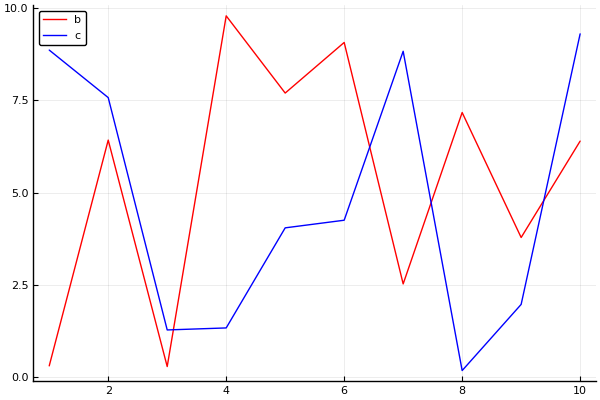

In [42]:
@df df plot(:a, [:b :c], colour = [:red :blue])

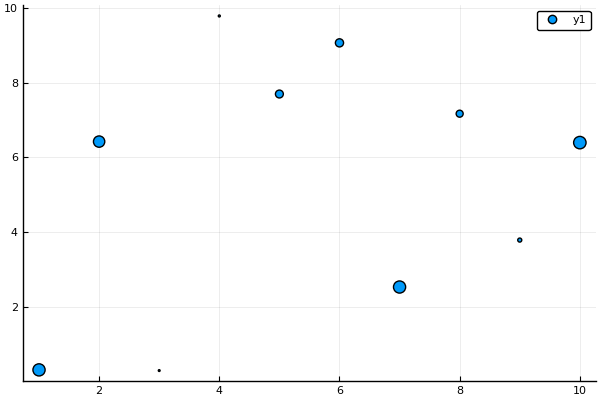

In [43]:
@df df scatter(:a, :b, markersize = 4 .* log.(:c .+ 0.1))

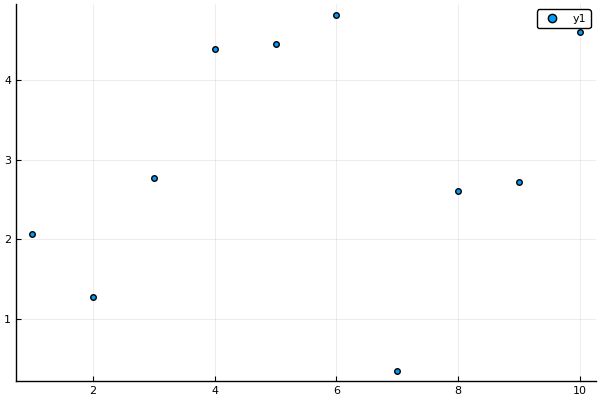

In [44]:
t = table(1:10, rand(10), names = [:a, :b]) # IndexedTable
@df t scatter(5 .* :b)

Inside a `@df` macro call, the `cols` utility function can be used to refer to a range of columns:

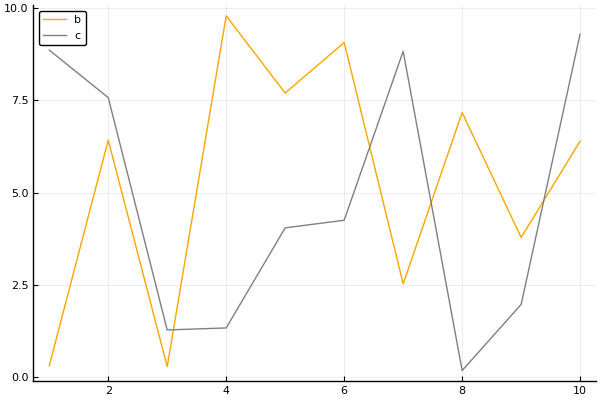

In [45]:
@df df plot(:a, cols(2:3), colour = [:orange :gray])

The `@df` macro plays nicely with the new syntax of the `Query.jl` data manipulation package (v0.8 and above), in that a plot command can be added at the end of a query pipeline, without having to explicitly collect the outcome of the query first,

In [46]:
using Query

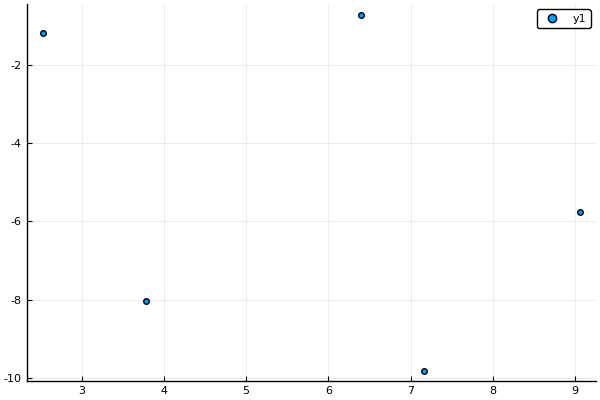

In [47]:
df |>
    @filter(_.a > 5) |>
    @map({_.b, d = _.c-10}) |>
    @df scatter(:b, :d)

The `@df` syntax is also compatible with the `Plots.jl` grouping machinery:

In [48]:
using RDatasets
school = RDatasets.dataset("mlmRev","Hsb82");

In [49]:
first(school,5)

,School,Minrty,Sx,SSS,MAch,MeanSES,Sector
,Categorical…,Categorical…,Categorical…,Float64,Float64,Float64,Categorical…
1,1224,No,Female,-1.528,5.876,-0.434383,Public
2,1224,No,Female,-0.588,19.708,-0.434383,Public
3,1224,No,Male,-0.528,20.349,-0.434383,Public
4,1224,No,Male,-0.668,8.781,-0.434383,Public
5,1224,No,Male,-0.158,17.898,-0.434383,Public


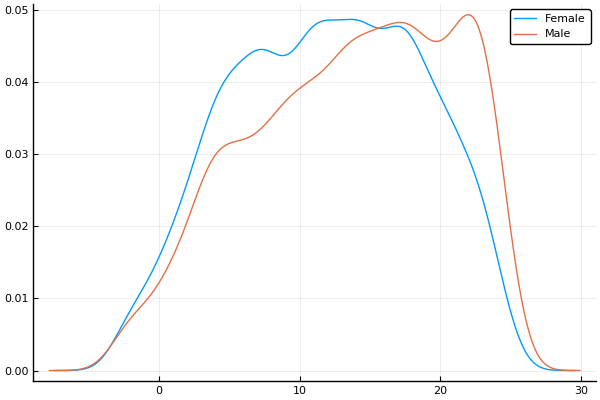

In [50]:
@df school density(:MAch, group = :Sx)

To group by more than one column, use a tuple of symbols,

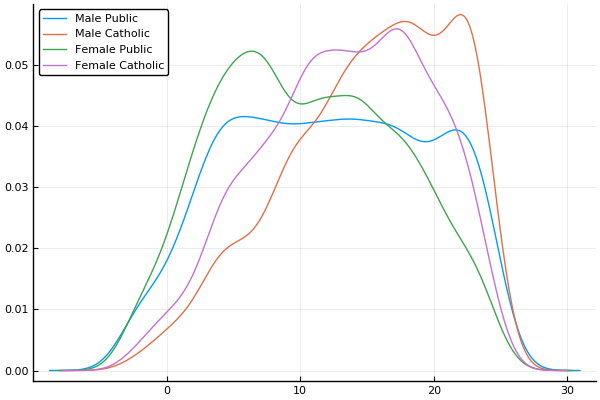

In [51]:
@df school density(:MAch, group = (:Sx, :Sector), legend = :topleft)

To name the legend entries with custom or automatic names (i.e. Gender = Male, Sector = Public) use the curly bracket syntax `group = {Gender = :Sx, :Sector}`

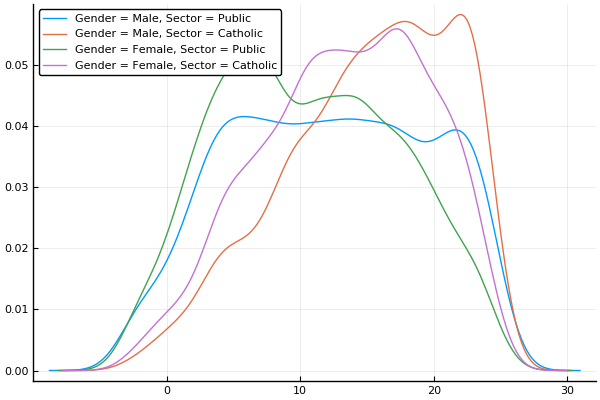

In [52]:
@df school density(:MAch, group = {Gender = :Sx, :Sector}, legend = :topleft)

Marginal histogram with Iris dataset

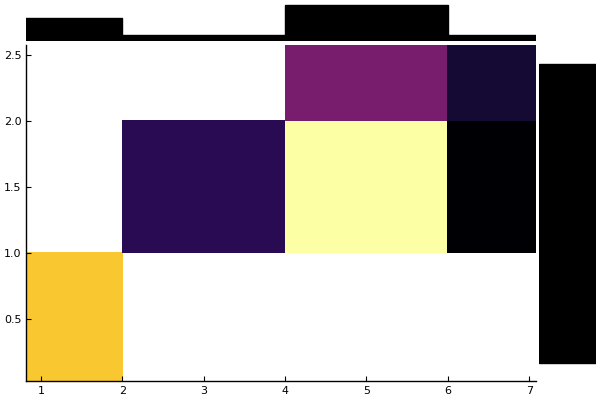

In [53]:
using RDatasets
iris = RDatasets.dataset("datasets","iris")
@df iris marginalhist(:PetalLength, :PetalWidth)

Correlation plot

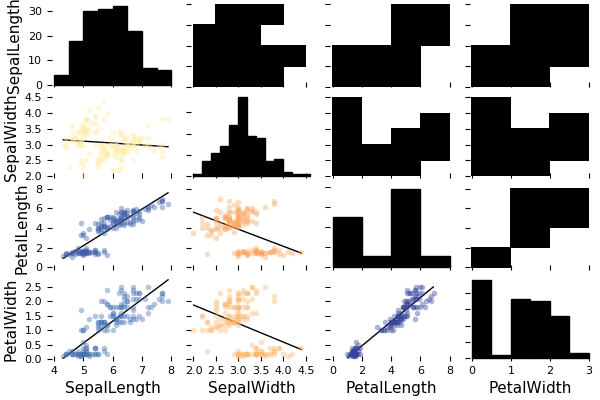

In [54]:
@df iris corrplot([:SepalLength :SepalWidth :PetalLength :PetalWidth], grid = false)

A correlation plot may also be produced from a matrix,

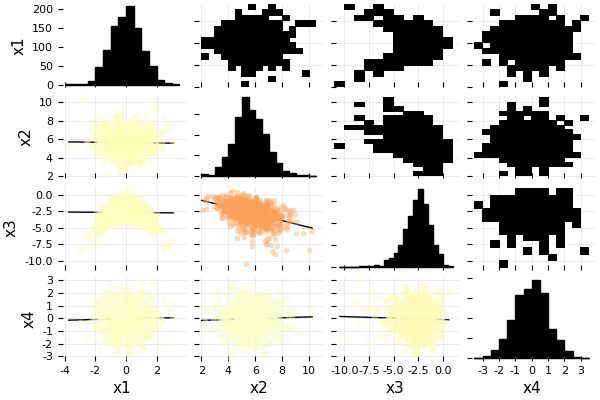

In [55]:
M = randn(1000,4)
M[:,2] .+= 0.8sqrt.(abs.(M[:,1])) .- 0.5M[:,3] .+ 5
M[:,3] .-= 0.7M[:,1].^2 .+ 2
corrplot(M, label = ["x$i" for i=1:4])

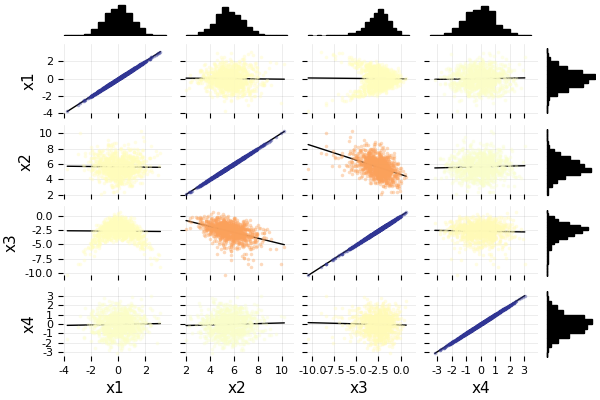

In [56]:
cornerplot(M)

Boxplot, dotplot, violin

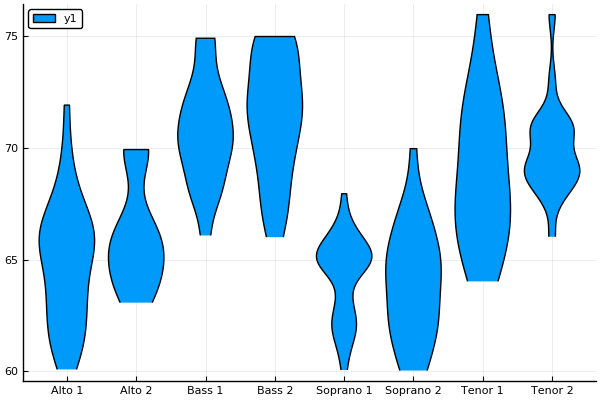

In [57]:
import RDatasets
singers = RDatasets.dataset("lattice","singer")
@df singers violin(:VoicePart,:Height,marker=(0.2,:blue,stroke(0)))

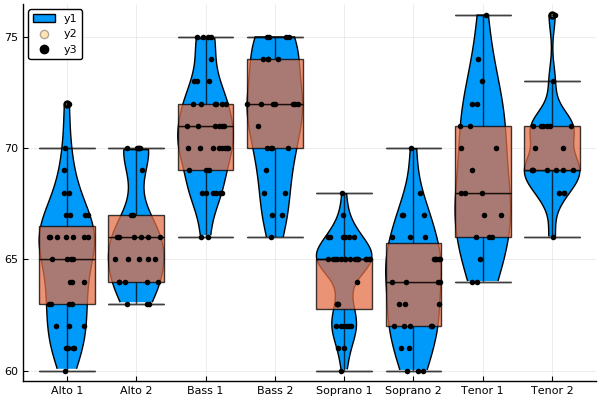

In [58]:
@df singers boxplot!(:VoicePart,:Height,marker=(0.3,:orange,stroke(2)), alpha=0.75)
@df singers dotplot!(:VoicePart,:Height,marker=(:black,stroke(0)))